In [14]:
# import opendatasets as od
# od.download('https://www.kaggle.com/datasets/brijbhushannanda1979/bigmart-sales-data')

In [15]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

In [55]:
data = pd.read_csv('train_v9rqX0R.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Dropping columns containing IDs

In [18]:
data.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,2004.000000,NaN,NaN,NaN,3101.296400


In [19]:
data.duplicated().sum()


0

Checking for correlation between input features

In [20]:
data.corr('pearson')


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Checking for unique values

In [21]:
print(data['Item_Type'].unique())
print(data['Outlet_Size'].unique())
print(data['Outlet_Location_Type'].unique())
print(data['Outlet_Type'].unique())
print(data['Item_Fat_Content'].unique())


['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' nan 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Assigning lables to unique categories

In [22]:
data['Item_Fat_Content'].replace(
    {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace=True)

data['Outlet_Size'].replace({'Small': 0, 'Medium':1, 'High':2}, inplace=True)
data['Outlet_Location_Type'].replace(
    {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}, inplace=True)
data['Outlet_Type'].replace(
    {'Supermarket Type1':0, 'Supermarket Type2':1, 
     'Supermarket Type3':2, 'Grocery Store':3}, inplace=True)


In [23]:
group = data[['Outlet_Size', 'Item_Outlet_Sales']].groupby('Outlet_Size', as_index=False).count()
group

,Outlet_Size,Item_Outlet_Sales
0,0.0,2388
1,1.0,2793
2,2.0,932


In [24]:
encoder = LabelEncoder()
data['Item_Type'] = encoder.fit_transform(data['Item_Type'])
data['Item_Fat_Content'] = encoder.fit_transform(data['Item_Fat_Content'])


Handeling missing values

In [25]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

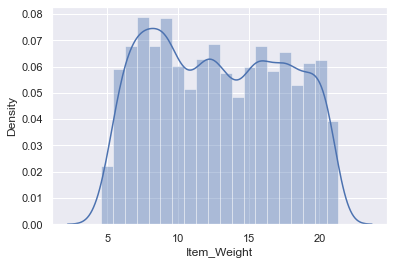

In [26]:
sns.distplot(data['Item_Weight'])

In [371]:
# train_no_null = data[data.Item_Weight.isnull() == False]
# item_avg = train_no_null[['Item_Type', 'Item_Weight']
#                          ].groupby(by='Item_Type', as_index=False).mean()

# for index in range(len(data)):
#     if np.isnan(data.iloc[index]['Item_Weight']):
#         data.at[index, 'Item_Weight'] = item_avg.iloc[int(data.iloc[index]
#                                                                  ['Item_Type'])]['Item_Weight']
        


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

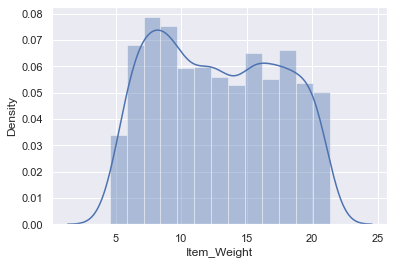

In [32]:
sns.distplot(item_avg.Item_Weight)


In [ ]:
train_no_null = data[data.Item_Weight.isnull() == False]

train_null = data[data.Item_Weight.isnull() == True]

item_avg = train_no_null[['Item_Identifier', 'Item_Weight']].groupby(
    by='Item_Identifier', as_index=False).mean()

tmp_data = pd.merge(right=train_null.drop('Item_Weight', axis=1), left=item_avg,
                    right_on='Item_Identifier', left_on='Item_Identifier', how='inner')

train_data = pd.concat([train_no_null, tmp_data], axis=0)

sns.distplot(train_data.Item_Weight)


In [53]:
temp1 = pd.merge(right=train_null, left=item_avg,
         right_on='Item_Identifier', left_on='Item_Identifier', how='inner')


In [54]:
temp1

,Item_Identifier,Item_Weight_x,Item_Weight_y,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,DRA24,19.350,NaN,1,0.069909,14,163.2868,1985,0.0,0,3,491.3604
1,DRA24,19.350,NaN,1,0.039735,14,165.7868,1985,1.0,2,2,4913.6040
2,DRA59,8.270,NaN,1,0.127308,14,186.6924,1985,1.0,2,2,7033.5112
3,DRA59,8.270,NaN,1,0.223985,14,186.2924,1985,0.0,0,3,555.2772
4,DRB01,7.390,NaN,0,0.081841,14,190.0530,1985,1.0,2,2,569.2590
...,...,...,...,...,...,...,...,...,...,...,...,...
1454,NCZ18,7.825,NaN,0,0.325781,9,252.7698,1985,0.0,0,3,761.0094
1455,NCZ30,6.590,NaN,0,0.026058,9,121.9098,1985,1.0,2,2,3374.2744
1456,NCZ53,9.600,NaN,0,0.024359,8,190.4214,1985,1.0,2,2,5652.6420
1457,NCZ54,14.650,NaN,0,0.082956,9,164.0552,1985,1.0,2,2,5523.4768


In [29]:
train_data.shape

(8519, 11)

In [30]:
data.shape

(8523, 11)

In [372]:
data.isna().sum()

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [373]:
store = data[['Outlet_Establishment_Year', 'Outlet_Size',
          'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']]

In [374]:
item_null = item[item['Item_Weight'].isna() == True]
item_no_null = item[item['Item_Weight'].isna() == False]

In [375]:
X = item_no_null.drop(['Item_Weight'], axis=1)
y = item_no_null['Item_Weight']


In [376]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_test = scaler.transform(item_null.drop('Item_Weight', axis=1))


In [377]:
item_imputer = RandomForestRegressor()
item_imputer.fit(X_train, y_train)

RandomForestRegressor()

In [378]:
y_test_pred = item_imputer.predict(X_test)


In [286]:
data_copy = data

In [289]:
predict[0]


array([ 13.84155 ,   0.13    ,  13.01    , 107.768524])

In [ ]:
index  = 0
for i in range(len(data)):
    if np.isnan(data_copy.at[i, 'Item_Weight']):
        data_copy.at[i, 'Item_Weight'] = predict[index]
        index += 1


<AxesSubplot:ylabel='Density'>

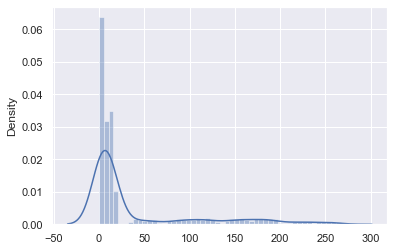

In [284]:
sns.distplot(predict)

In [ ]:
predict

In [379]:
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mse_test

17.169455332165814

In [380]:
rmse = np.sqrt(mse_test)
rmse

4.143604147619053

In [381]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.20266552971486684

In [382]:
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
adj_r2

0.20096666365602056

In [35]:
train_data.drop('Item_Identifier', axis=1, inplace=True)


In [36]:
from sklearn.impute import KNNImputer
store_imputer = KNNImputer(n_neighbors=1)
store_transformed = store_imputer.fit_transform(train_data)

In [37]:
store_transformed = pd.DataFrame(data=store_transformed, columns=train_data.columns)
# item_treansformed = pd.DataFrame(data=item_treansformed, columns=item.columns)


In [39]:
# data = pd.concat([item_treansformed, store_transformed], axis=1)
store_transformed.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4.0,249.8092,1999.0,1.0,0.0,0.0,3735.1380
1,5.92,1.0,0.019278,14.0,48.2692,2009.0,1.0,2.0,1.0,443.4228
2,17.50,0.0,0.016760,10.0,141.6180,1999.0,1.0,0.0,0.0,2097.2700
3,19.20,1.0,0.000000,6.0,182.0950,1998.0,0.0,2.0,3.0,732.3800
4,8.93,0.0,0.000000,9.0,53.8614,1987.0,2.0,2.0,0.0,994.7052


In [43]:
np.unique(store_transformed.Outlet_Size.values)

array([0., 1., 2.])

<AxesSubplot:>

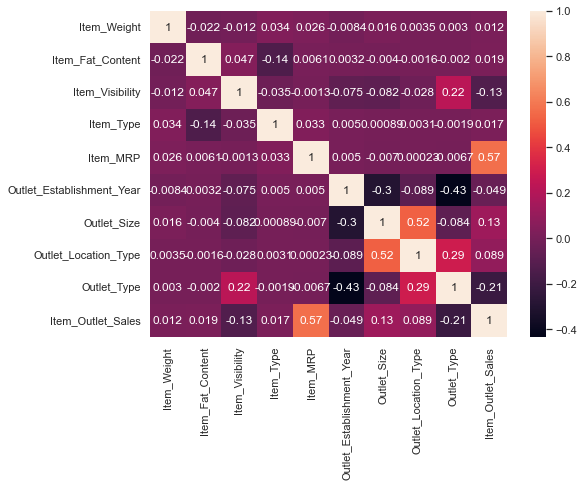

In [143]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

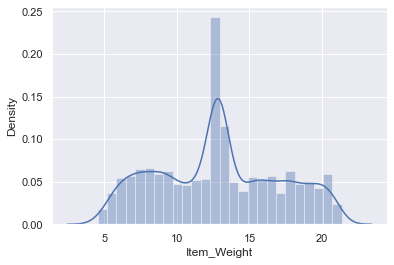

In [193]:
sns.distplot(data['Item_Weight'])

In [148]:
item_avg

,Item_Type,Item_Weight
0,0,12.277108
1,1,11.346936
2,2,12.768202
3,3,12.305705
4,4,13.426069
5,5,12.867061
6,6,13.224769
7,7,11.400328
8,8,13.142314
9,9,13.384736


In [147]:
data.sort_values('Item_Weight', ascending=False).head(20)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4468,21.35,0,0.068822,3,258.3278,1997.0,0.0,0.0,0.0,7028.8506
2368,21.35,0,0.068809,3,258.5278,2004.0,0.0,1.0,0.0,5206.5560
483,21.35,0,0.115195,3,258.3278,1998.0,0.0,2.0,3.0,520.6556
6389,21.35,0,0.078061,6,96.0094,2009.0,1.0,2.0,1.0,380.8376
2802,21.35,0,0.068765,3,260.4278,1987.0,2.0,2.0,0.0,3644.5892
4257,21.35,0,0.130127,6,96.2094,1998.0,0.0,2.0,3.0,190.4188
43,21.35,0,0.069103,3,259.9278,2009.0,1.0,2.0,1.0,6768.5228
8221,21.25,0,0.024756,9,146.7102,2009.0,1.0,2.0,1.0,1603.9122
5457,21.25,0,0.024706,9,145.1102,2002.0,0.0,1.0,0.0,1603.9122
7042,21.25,0,0.113834,8,232.8300,2002.0,0.0,1.0,0.0,1398.1800


In [117]:
# group = data[['Outlet_Size', 'Item_Outlet_Sales']].groupby("Outlet_Size", as_index=False).count()
# group_trans = X_transformed[['Outlet_Size', 'Item_Outlet_Sales']].groupby("Outlet_Size", as_index=False).count()
# print(group.head())
# print(group_trans)


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

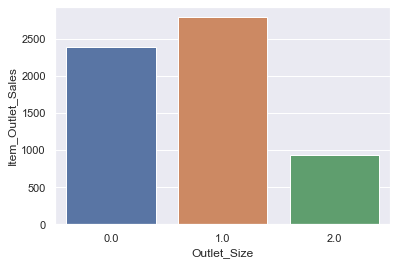

In [118]:
# sns.barplot(group['Outlet_Size'], group['Item_Outlet_Sales'])


<AxesSubplot:xlabel='Item_Outlet_Sales'>

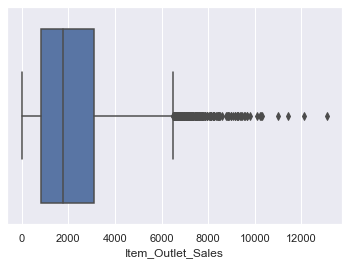

In [119]:
sns.boxplot(y)

Scaling features and training model

In [44]:
X = store_transformed.drop(['Item_Outlet_Sales'], axis=1)
y = store_transformed['Item_Outlet_Sales']


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [122]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X_train, X_test, y_train, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    
    models_list = []
    
    mse_train = []
    mse_test = []
    
    rmse_train = []
    rmse_test = []
    
    r2 = []
    adj_r2 = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        mse_train.append(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
        mse_test.append(mean_squared_error(y_true=y_test, y_pred=y_test_pred))
        
        rmse_train.append(np.sqrt(mse_train[i]))
        rmse_test.append(np.sqrt(mse_test[i]))

        r2.append(r2_score(y_true=y_test, y_pred=y_test_pred))
        adj_r2.append(1 - (1-r2[i])*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- MSE: {:.4f}".format(mse_train[i]))
        # print('- RMSE: {:.4f}'.format(rmse_train[i]))
     
        print('----------------------------------')

        # print('Model performance for Test set')
        # print("- MSE: {:.4f}".format(mse_test[i]))
        # print('- RMSE: {:.4f}'.format(rmse_test[i]))
        # print('- R2_Score: {:.4f}'.format(r2[i]))
        # print('- ADJ. R2 Score: {:.4f}'.format(adj_r2[i]))
        # print('='*35)
        # print('\n')
        
    report = pd.DataFrame(list(zip(models_list, rmse_test, r2, adj_r2)), columns=['Model Name', 'RMSE', 'R2 Score', 'Adj R2 Score']).sort_values(by=["RMSE"])
        
    return report

In [123]:
# Dictionary which contains models for experiment
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forrest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "XGBRegressor": XGBRegressor(),
}

In [124]:
# report = evaluate_models(X_train, X_test, y_train, y_test, models)
# report

RandomForestRegressor is performing best among others

Using GridSearchCV to find best parameters

In [125]:
params = {
    'criterion': ["absolute_error", "friedman_mse", "poisson"],
    'max_depth': range(6, 11),
    'min_samples_leaf': range(2, 5),
    'max_features': range(1, X_train.shape[1])
}

In [126]:
# gs_cv = GridSearchCV(estimator=RandomForestRegressor(), param_grid=params, n_jobs=-1)

In [127]:
# gs_cv.fit(X_train, y_train)

In [128]:
# best_param = gs_cv.best_params_
# best_param

In [47]:
best_param = {'criterion': 'poisson',
              'max_depth': 6,
              'max_features': 7,
              'min_samples_leaf': 2,
              }


In [48]:
model = RandomForestRegressor(**best_param)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

In [49]:
mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mse_test

1180938.806546739

In [50]:
rmse_test = np.sqrt(mse_test)
rmse_test


1086.7100839445354

In [51]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2


0.6015025227053152

In [52]:
adj_r2 = 1 - (1-r2)*(len(y_test)-1) / (len(y_test)-X_test.shape[1]-1)
adj_r2

0.5998107881318944